In [37]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [38]:
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df.drop(columns=["sepal length (cm)", "sepal width (cm)"], inplace=True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


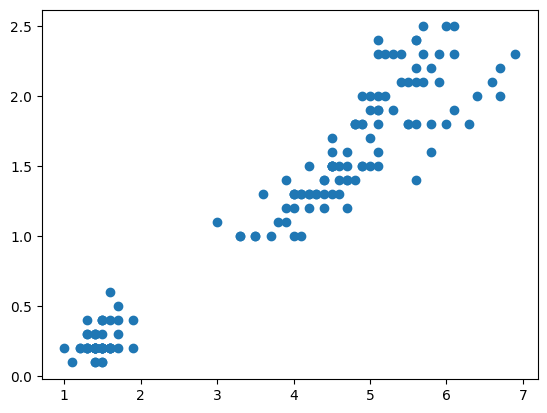

In [39]:
plt.scatter(df["petal length (cm)"], df["petal width (cm)"])

In [40]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [41]:
y_predicted = km.fit_predict(df[["petal length (cm)", "petal width (cm)"]])
df["cluster"] = y_predicted
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [42]:
df1 = df[df["cluster"] == 0]
df2 = df[df["cluster"] == 1]
df3 = df[df["cluster"] == 2]

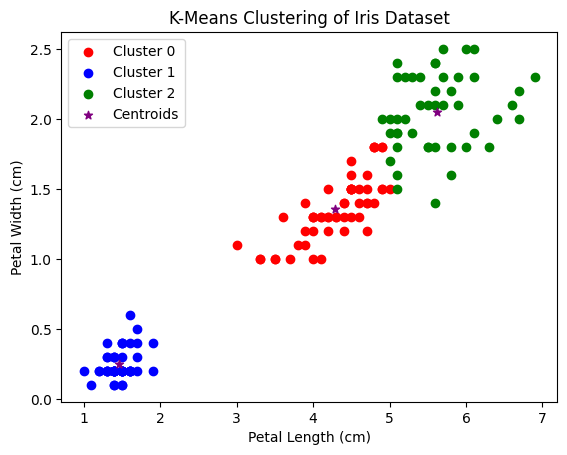

In [43]:
plt.scatter(df1["petal length (cm)"], df1["petal width (cm)"], color="red")
plt.scatter(df2["petal length (cm)"], df2["petal width (cm)"], color="blue")
plt.scatter(df3["petal length (cm)"], df3["petal width (cm)"], color="green")
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color="purple", marker="*", label="Centroids")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("K-Means Clustering of Iris Dataset")
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2", "Centroids"])

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[["petal length (cm)", "petal width (cm)"]] = scaler.fit_transform(df[["petal length (cm)", "petal width (cm)"]])
df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


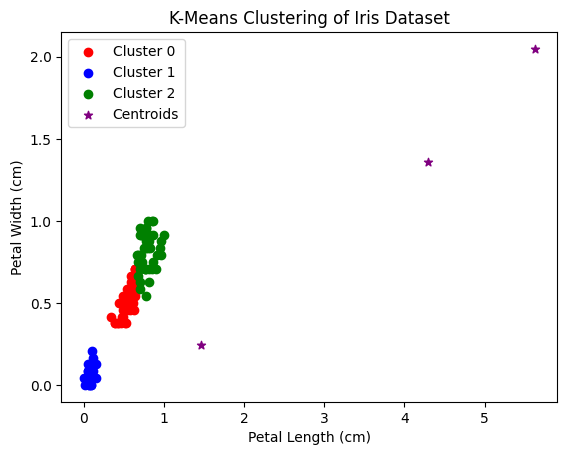

In [45]:
df1 = df[df["cluster"] == 0]
df2 = df[df["cluster"] == 1]
df3 = df[df["cluster"] == 2]

plt.scatter(df1["petal length (cm)"], df1["petal width (cm)"], color="red")
plt.scatter(df2["petal length (cm)"], df2["petal width (cm)"], color="blue")
plt.scatter(df3["petal length (cm)"], df3["petal width (cm)"], color="green")
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color="purple", marker="*", label="Centroids")

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("K-Means Clustering of Iris Dataset")
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2", "Centroids"])

In [29]:
km = KMeans(n_clusters=3)
km.fit(df[["petal length (cm)", "petal width (cm)"]])
y_predicted = km.predict(df[["petal length (cm)", "petal width (cm)"]])
df["cluster"] = y_predicted
df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [30]:
km.cluster_centers_

array([[0.55867014, 0.51041667],
       [0.07830508, 0.06083333],
       [0.7740113 , 0.81510417]])

In [33]:
k_range = range(1, 10)
sse = []

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[["petal length (cm)", "petal width (cm)"]])
    sse.append(km.inertia_)
    
sse

[28.368353219727197,
 5.176463590044368,
 1.7018746881920968,
 1.1826653136050636,
 0.9618646531967754,
 0.7974736016322733,
 0.6007846803096585,
 0.4858084553914369,
 0.4675683614617432]

Text(0, 0.5, 'SSE')

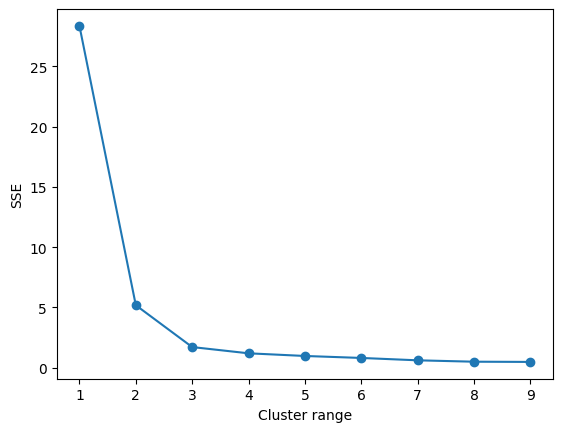

In [48]:
plt.plot(k_range, sse, marker="o")
plt.xlabel("Cluster range")
plt.ylabel("SSE")